<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Count_points_within_polygons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!sudo apt install python3-rtree
#!sudo apt-get install -y libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
airports = gpd.read_file("Airports_SCAG_Region.geojson")
airports.head()

,OBJECTID,LOC_ID,X,Y,NAME,USE_,COUNTY,YEAR,geometry
0,1,AJO,444277.416719,3.750865e+06,Corona Municipal Airport,PU,Riverside,2009,POINT (-117.60268 33.89669)
1,2,APV,482926.903875,3.826268e+06,Apple Valley Airport,PU,San Bernardino,2009,POINT (-117.18616 34.57806)
2,3,AVX,368428.577462,3.696913e+06,Catalina Airport,PU,Los Angeles,2009,POINT (-118.41488 33.40349)
3,4,BLH,711744.260243,3.722742e+06,Blythe Airport,PU,Riverside,2009,POINT (-114.71737 33.62345)
4,5,BNG,513701.841566,3.753637e+06,Banning Municipal Airport,PU,Riverside,2009,POINT (-116.85177 33.92308)


In [4]:
tracts = gpd.read_file("tl_2017_06_tract.shp")
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


In [5]:
airports.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
tracts = tracts.to_crs(4326)

In [11]:
import geopandas as gpd
airports_in_tracts = gpd.sjoin(tracts, airports, how = "left")
airports_in_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_left,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,geometry,index_right,OBJECTID,LOC_ID,X,Y,NAME_right,USE_,COUNTY,YEAR
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,...,"POLYGON ((-122.01721 37.53932, -122.01719 37.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,...,"POLYGON ((-122.00230 37.52984, -122.00224 37.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,"POLYGON ((-118.20284 34.01966, -118.20283 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,...,"POLYGON ((-118.21963 34.02629, -118.21945 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,...,"POLYGON ((-118.22023 34.02056, -118.22018 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
airports_in_tracts.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME_left', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'index_right', 'OBJECTID', 'LOC_ID', 'X', 'Y', 'NAME_right',
       'USE_', 'COUNTY', 'YEAR'],
      dtype='object')

In [18]:
counts = airports_in_tracts.groupby("GEOID",as_index=False).count()[["GEOID","LOC_ID"]]
counts

,GEOID,LOC_ID
0,06001400100,0
1,06001400200,0
2,06001400300,0
3,06001400400,0
4,06001400500,0
...,...,...
8052,06115040800,0
8053,06115040901,0
8054,06115040902,0
8055,06115041000,0


In [29]:
tracts_with_counts = tracts.merge(counts, on = "GEOID")

In [30]:
tracts_with_counts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,LOC_ID
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5...",0
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5...",0
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0...",0
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0...",0
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0...",0


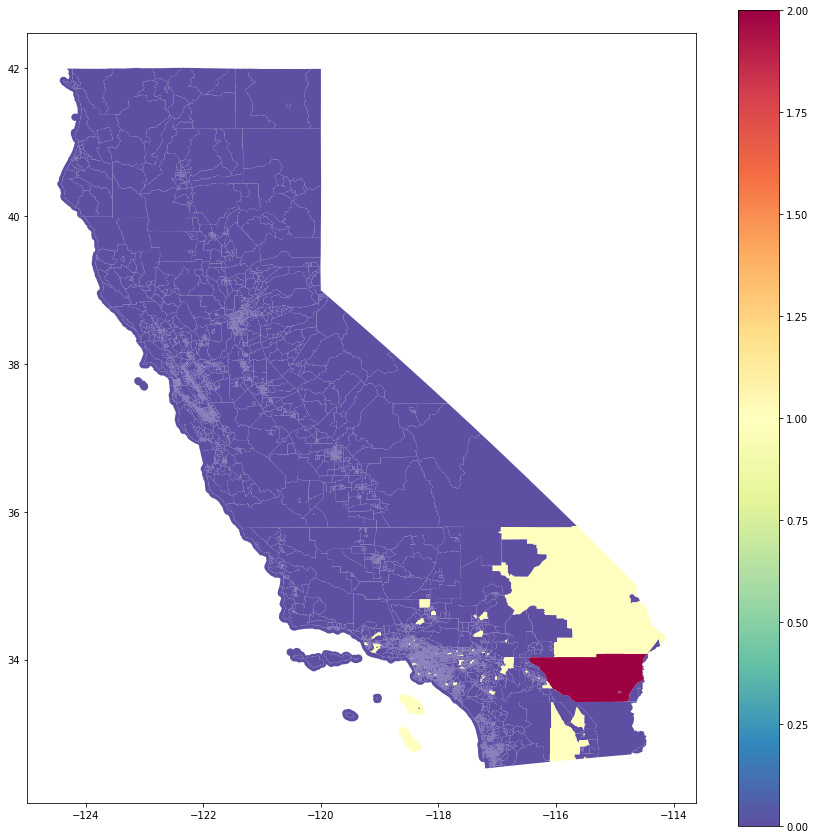

In [31]:
tracts_with_counts.plot(column = "LOC_ID", legend = True, cmap = "Spectral_r", figsize = (15,15), )

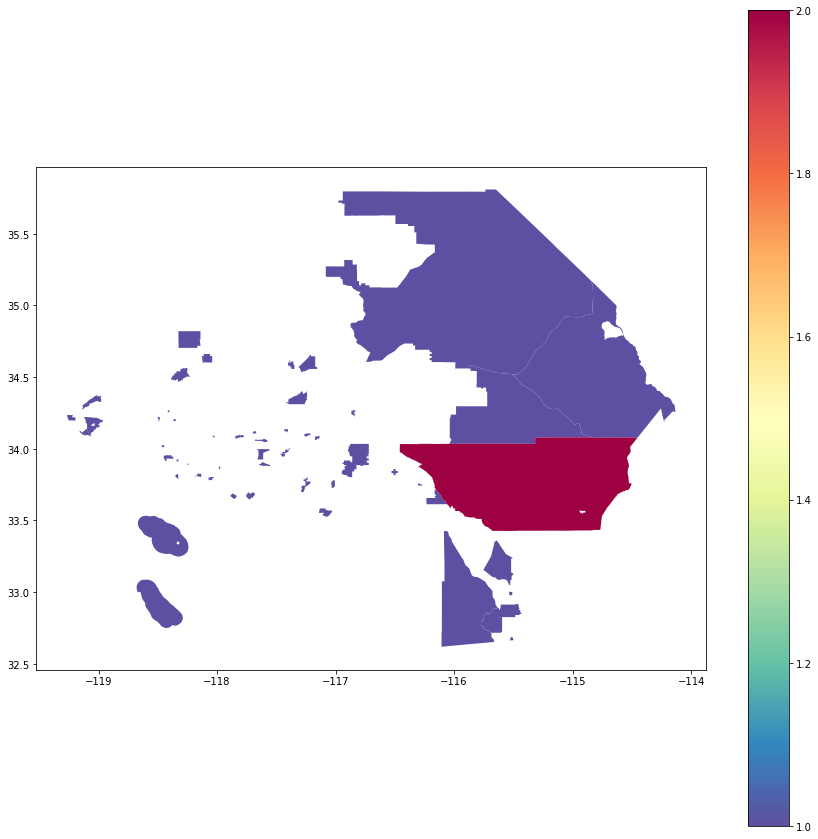

In [32]:
tracts_scag = tracts_with_counts[tracts_with_counts.LOC_ID >0]
tracts_scag.plot(column = "LOC_ID", legend = True, cmap = "Spectral_r", figsize = (15,15))